V tej jupiter datoteki je narejena analiza podatkov, zbranih v datoteki 'zbrani_podatki.csv'.

Za začetek uvozimo potrebne datoteke:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re

Najprej uvozimo podatke in jih predstavimo v obliki tabele. Zaradi težav pri klicanju zadnjih dveh stolpcev, ker njuno ime vsebuje dve besedi, tabelo preimenujemo, tako da so imena vseh stolpcev natanko ena beseda.

In [2173]:
podatki = pd.read_csv('zbrani_podatki.csv', index_col='ID')
pd.options.display.max_rows = 40

dict = {'naslov': 'naslov','avtor' : 'avtor','mesec': 'mesec', 'glavno področje' : 'gl_pod', 'ostala področja' : 'os_pod'}
podatki.rename(columns = dict, inplace = True)
podatki.head(20)

,naslov,avtor,mesec,gl_pod,os_pod
ID,,,,,
1,Generalized conformal maps as classical symmet...,Edward B. Baker III,1,Mathematical Physics (math-ph),High Energy Physics - Theory (hep-th)
2,Duality family of KdV equation,"Xin Gu, Yuan-Yuan Liu, Wen-Du Li, Wu-Sheng Dai",1,Mathematical Physics (math-ph),Exactly Solvable and Integrable Systems (nlin.SI)
3,Guay&#39;s affine Yangians and non-rectangular...,Mamoru Ueda,1,Quantum Algebra (math.QA),empty
4,A Compact Introduction to Fractional Calculus,Alexander I. Zhmakin,1,History and Overview (math.HO),empty
5,Examples of left-orderable and non-left-ordera...,"Azer Akhmedov, Cody Martin",1,Group Theory (math.GR),Geometric Topology (math.GT)
6,A Global Optimization Algorithm for K-Center C...,"Jiayang Ren, Ningning You, Kaixun Hua, Chaojie...",1,Optimization and Control (math.OC),Machine Learning (cs.LG)
7,The Sticky L\&#39;evy Process as a solution to...,"Miriam Ramírez, Gerónimo Uribe Bravo",1,Probability (math.PR),Classical Analysis and ODEs (math.CA)
8,Learning Koopman eigenfunctions of stochastic ...,"Alexander Sikorski, Enric Ribera Borrell, Marc...",1,Dynamical Systems (math.DS),Probability (math.PR)
9,A stabilized local integral method using RBFs ...,"L. Ponzellini Marinelli, L. Raviola",1,Numerical Analysis (math.NA),Computational Physics (physics.comp-ph)


Najprej predstavimo število člankov objavlenih v posameznem mescu.

<Axes: xlabel='mesec'>

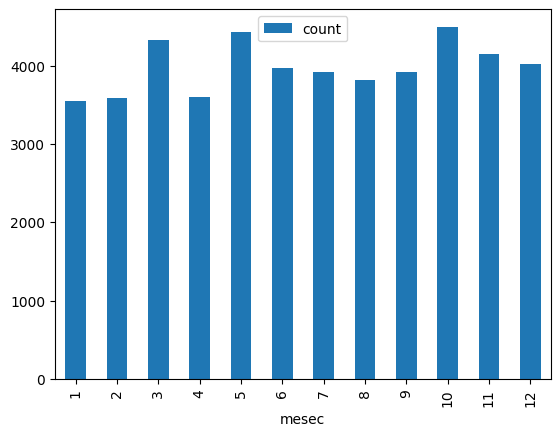

In [2176]:
#graf števila člankov glede na mesec

vsi = podatki.value_counts('mesec').reset_index().sort_values(by = 'mesec', ascending=True).set_index('mesec')
vsi.plot.bar()


<Axes: xlabel='count'>

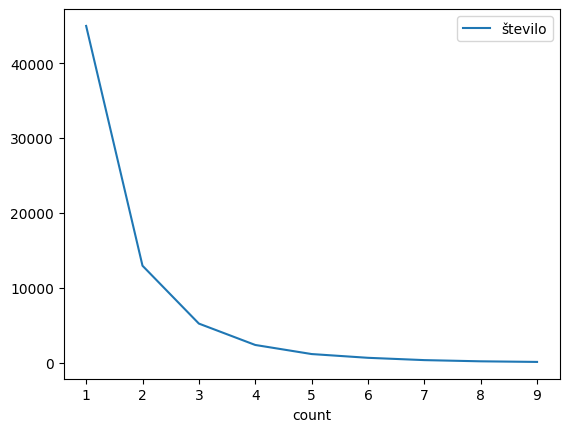

In [2174]:
#graf ki prikaže število posameznih avtorjev v odvisnosti od tega kolikokrat se pojavijo
avtorji = podatki['avtor'].str.split(', ', expand=True).stack().value_counts().reset_index()
avtorji = pd.DataFrame(avtorji.value_counts('count'))  
avtorji.rename(columns = {'count' : 'število'}, inplace = True)
avtorji = avtorji.sort_index()  #to nam vrne seznam števila avtorjev

avtorji.head(9).plot.line()

<Axes: xlabel='count'>

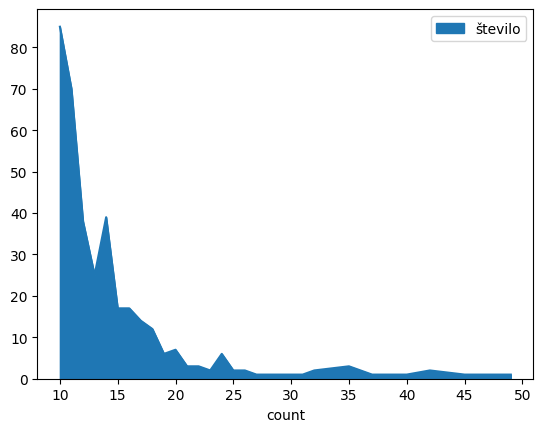

In [2175]:
avtorji.tail(-9).plot.area()

<Axes: xlabel='mesec'>

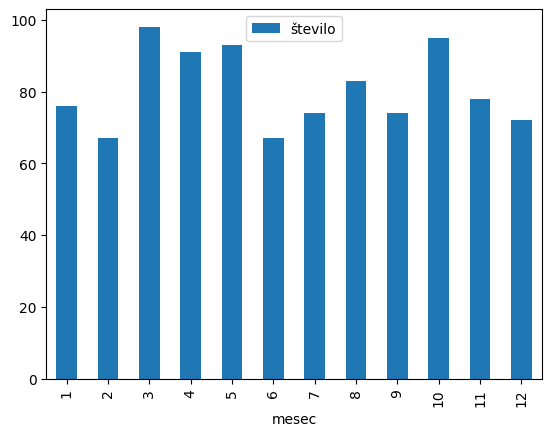

In [2177]:
#število člankov z glavnim področjem Group Theory glede na mesec

gtgm = podatki[podatki.gl_pod == 'Group Theory (math.GR)'].value_counts('mesec').reset_index()
gtgm = gtgm.sort_values(by = 'mesec', ascending=True).set_index('mesec')
gtgm.rename(columns = {'count' : 'število'}, inplace = True)

gtgm.plot.bar()

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Tilen'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'Maj'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Avg'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Okt'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

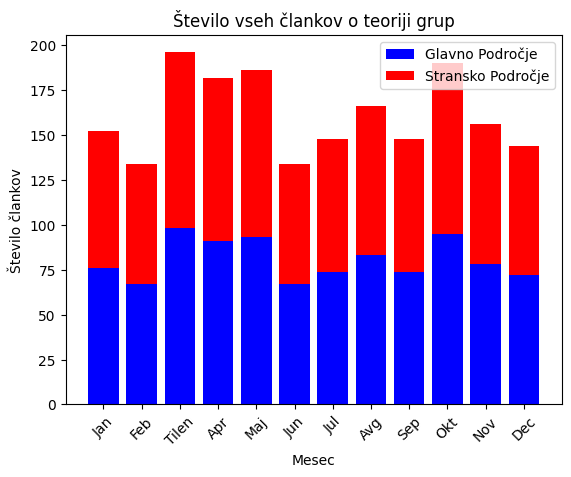

In [2178]:
#število vseh člankov o teoriji grup glede na mesec

gtgm.rename(columns = {'število' : 'glavno področje'}, inplace = True)
gtsp = podatki[podatki.os_pod.str.contains('Group Theory', case=False, na=False)].value_counts('mesec').reset_index()
gtsp = gtsp.sort_values(by = 'mesec', ascending=True).set_index('mesec')
gtsp.rename(columns = {'count' : 'stransko področje'}, inplace = True)
mesci = ['Jan', 'Feb', 'Tilen', 'Apr', 'Maj', 'Jun', 'Jul', 'Avg', 'Sep', 'Okt', 'Nov', 'Dec']



combined_gt = pd.concat([gtgm, gtsp], axis=1) #to nam da kombinirano razpredelnico števila vseh člankov ki na kakršenkoli način vsebujejo group theory


fig, cgraf = plt.subplots()

cgraf.bar(combined_gt.index, combined_gt['glavno področje'], label='Glavno Področje', color='blue')
cgraf.bar(combined_gt.index, combined_gt['glavno področje'], bottom=combined_gt['glavno področje'], label='Stransko Področje', color='red')
cgraf.set_xlabel('Mesec')
cgraf.set_ylabel('Število člankov')
cgraf.set_title('Število vseh člankov o teoriji grup')
cgraf.legend()
cgraf.set_xticks(range(1, 13))
cgraf.set_xticklabels(mesci, rotation=45)





[Text(0, 0, 'Analysis of PDEs'),
 Text(1, 0, 'Combinatorics'),
 Text(2, 0, 'Optimization and Control'),
 Text(3, 0, 'Numerical Analysis'),
 Text(4, 0, 'Probability'),
 Text(5, 0, 'Information Theory'),
 Text(6, 0, 'Number Theory'),
 Text(7, 0, 'Algebraic Geometry'),
 Text(8, 0, 'Differential Geometry'),
 Text(9, 0, 'Dynamical Systems'),
 Text(10, 0, 'Machine Learning'),
 Text(11, 0, 'Functional Analysis'),
 Text(12, 0, 'Mathematical Physics'),
 Text(13, 0, 'Group Theory'),
 Text(14, 0, 'Statistics Theory'),
 Text(15, 0, 'Representation Theory'),
 Text(16, 0, 'Geometric Topology'),
 Text(17, 0, 'Classical Analysis and ODEs'),
 Text(18, 0, 'Quantum Physics'),
 Text(19, 0, 'Logic')]

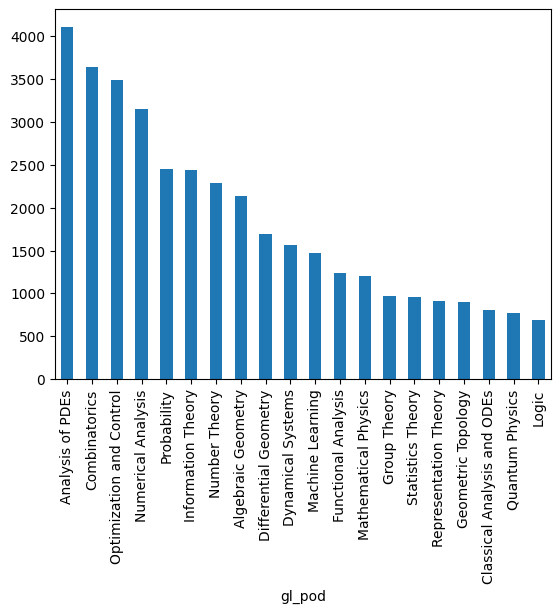

In [2179]:
graf = podatki['gl_pod'].value_counts().head(20)
seznam = pd.DataFrame(graf)
seznam = seznam.index.tolist()
nov_seznam = [re.sub(r"\[.*?\]| \(.*?\)|\{.*?\}", "", s) for s in seznam]

graf.plot.bar().set_xticklabels(nov_seznam)

In [2180]:
#contains_substring = podatki['gl_pod'].str.contains(substring, case=False, na=False)

([<matplotlib.patches.Wedge at 0x14fcc124860>,
 [Text(-0.8046350422893874, 0.7500416313245258, 'math'),
  Text(0.4546700147721677, -1.0016362501762188, 'cs'),
  Text(0.8342569656618144, -0.7169486140894216, 'math-ph'),
  Text(0.920048122223517, -0.6029191096598123, 'quant-ph'),
  Text(0.9760906991551976, -0.5071951764584495, 'stat'),
  Text(1.02092024640274, -0.4095385824131456, 'eess'),
  Text(1.0538142076558341, -0.3153975518971366, 'hep-th'),
  Text(1.074693954099901, -0.23459093124227984, 'physics'),
  Text(1.0954534622069811, -0.09990851884968743, 'ostalo')])

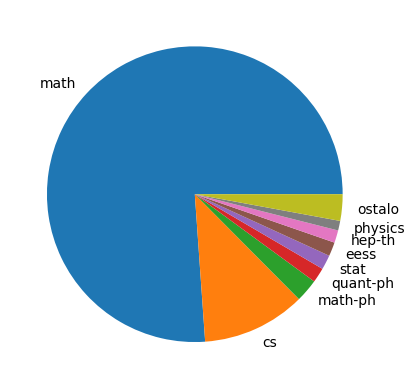

In [2181]:
#šštevilo člankov na posameznem nadpodročjem
podatki['x'] = podatki['gl_pod'].str.extract(r'\(\s*(.+?)\s*[.)]')

an = podatki['x'].value_counts().reset_index()

nad_500 = an[an['count'] >= 500]

drugo = an[an['count'] < 500].sum()['count']
df = pd.DataFrame({'x' : 'ostalo', 'count': [drugo]})


nad_500 = pd.concat([nad_500, df], ignore_index=True)


plt.pie(nad_500['count'], labels=nad_500['x'])

In [2182]:
#tabela ki nam pove, koliko člankov se nanaša na koliko področij

podatki['os_pod'].str.split(',').str.len()

podatki['st_podrocij'] = podatki['os_pod'].apply(lambda x: 1 if x == 'empty' else len(x.split(',')) + 1)

tabela_st_podrocij = podatki['st_podrocij'].value_counts().reset_index()

tabela_st_podrocij.rename(columns = {'st_podrocij' : 'Število področij', 'count' : 'Število člankov'}, inplace = True)

tabela_st_podrocij

,Število področij,Število člankov
0,1,22754
1,2,15579
2,3,6388
3,4,2151
4,5,764
5,6,104
6,7,30
7,8,1


In [2183]:
pod = podatki.set_index('avtor')
pod = pod.apply(lambda row: row['gl_pod'] if row['os_pod'] == 'empty' else row['gl_pod'] + ', ' + row['os_pod'], axis=1)
#ta tabela je zdaj tabela avtorjev in glavnih ter stranskih področij

pod = pod.reset_index()
pod['avtor'] = pod['avtor'].str.split(',') 
pod = pod.explode('avtor')
pod = pod.sort_values(by='avtor', ascending=True)
pod = pod.dropna(subset=['avtor'])
pod.columns = ['avtor', 'področja']
pod['področja'] = pod['področja'].str.split(',')
pod = pod.groupby('avtor', as_index=False).agg({'področja': lambda x: list(set(sum(x, [])))})  #tabela unikatnih avtorjev ter število unikatnih področij h katerim so pripomogli

pod['področja'] = pod['področja'].apply(len)

pod

pod = pod['področja'].value_counts() #tabela (oz list) avtorjev ki pripomorejo k n področjem v odvisnoti od n

pod = pod.reset_index()

pod.columns = ['število področij h katerim je avtor pripomogel', 'število avtorjev']

pod

,število področij h katerim je avtor pripomogel,število avtorjev
0,1,28849
1,2,23198
2,3,11998
3,4,6292
4,5,3271
5,6,1449
6,7,867
7,8,417
8,9,228
9,10,144


In [2185]:
#katero področje se najpogosteje pojavi samo (torej brez stranskih področij)

tab2 = podatki['gl_pod'].value_counts().reset_index()
tab2 = tab2[tab2['count'] > 500]
#to je tabela  področij li se pojavijo več kot 500 krat (hočemo dovolj velik sample size)
seznam_pogostih_predmetov = tab2['gl_pod'].tolist()

tab3 = podatki[podatki.os_pod == 'empty']
tab3 = tab3[tab3['gl_pod'].apply(lambda x: x in seznam_pogostih_predmetov)]
tab3 = tab3['gl_pod'].value_counts().reset_index()
#tabela istih področij takrat ko nimajo stranskega področja

seznam_predmetov_tab3 = tab3['gl_pod'].tolist()
tab2 = tab2[tab2['gl_pod'].apply(lambda x: x in seznam_predmetov_tab3)].reset_index().drop(columns=['index'])
#psokrbimo da imata tabeli enake vnose

tab4 = tab2
tab4['count'] = tab3['count'] / tab2['count']
tab4 = tab4.sort_values(by = 'count', ascending=False).head(10)
tab4

,gl_pod,count
0,Analysis of PDEs (math.AP),0.690285
10,Functional Analysis (math.FA),0.659935
1,Combinatorics (math.CO),0.634842
4,Probability (math.PR),0.626020
2,Optimization and Control (math.OC),0.623995
3,Numerical Analysis (math.NA),0.598033
19,Complex Variables (math.CV),0.582258
17,Logic (math.LO),0.573699
18,Rings and Algebras (math.RA),0.572289
9,Dynamical Systems (math.DS),0.563857
